# Chapter 3 - A Tour of Machine Learning Classifiers Using Scikit-Learn



# Tổng quan

- [1. Giới thiệu](#1.-Giới-thiệu)
- [2. Nội dung](#2.-Nội-dung)
- [3. Ý tưởng chính](#3.-Ý-tưởng-chính)
- [4. Demo đơn giản](#4.-Demo-đơn-giản)
- [5. Hạn chế](#5.-Hạn-chế)
- [6. Tài liệu tham khảo](#6.-Tài-liệu-tham-khảo)



<br>
<br>

In [2]:
from IPython.display import Image
%matplotlib inline

## 1. Giới thiệu

Hồi quy logistic (logistic regression) là một mô hình thống kê, mô hình hoá biến phụ thuộc nhị phân. Về cơ bản, ý tưởng của hồi quy logistic là tìm mối quan hệ giữa các đặc trưng và xác suất của kết quả cụ thể (0 hoặc 1, đậu hoặc rớt,..)

Trong thực tế, hồi quy logistic không chỉ ứng dụng trong dự đoán nhãn mà còn dùng để dự đoán xác suất xảy ra của một vấn đề cụ thể. Trong dự báo thời tiết, hồi quy logistic không chỉ dự đoán một ngày trong tương lai có mưa hay không, mà còn dự đoán được xác suất xảy ra mưa. Tương tự, hồi quy logistic có thể được sử dụng để dự đoán khả năng bệnh nhân mắc một bệnh cụ thể với các triệu chứng nhất định, đó là lý do tại sao nó rất phổ biến trong lĩnh vực y học.

|![sd](https://raw.githubusercontent.com/TheDuyIT/Introduction-to-machine-learning/master/03_03.png)| 
|:--:| 
|*Mô hình hồi quy logistic*|


Ảnh trên biểu diễn một mô hình hồi quy logistic cơ bản với:

- $x=[1,x_1, x_2,..., x_n]$ là các biến độc lập biểu thị cho các đặc trưng trong data set
- $w=[w_0, w_1, w_2,..., w_n]$ là các tham số cần học, với $w_0$ là hệ số bias
- net input $\sum$ = $w^Tx $

Và nếu ai đã tìm hiểu về linear regression thì sẽ nhận ra sự khác biệt về *activation function* giữa linear regression và logistic regression là hàm **Sigmoid**

Cùng với activation function, **loss function** là một hàm quan trọng đối với một mô hình học máy.

Như vậy, ở bài viết này chúng ta sẽ cùng nhau phân tích về activation function và loss function của logistic regression.

## 2. Ý tưởng chính

### 2.1 Activation function

Trước tiên hãy cùng nhau biểu diễn hàm sigmoid trên trục toạ độ

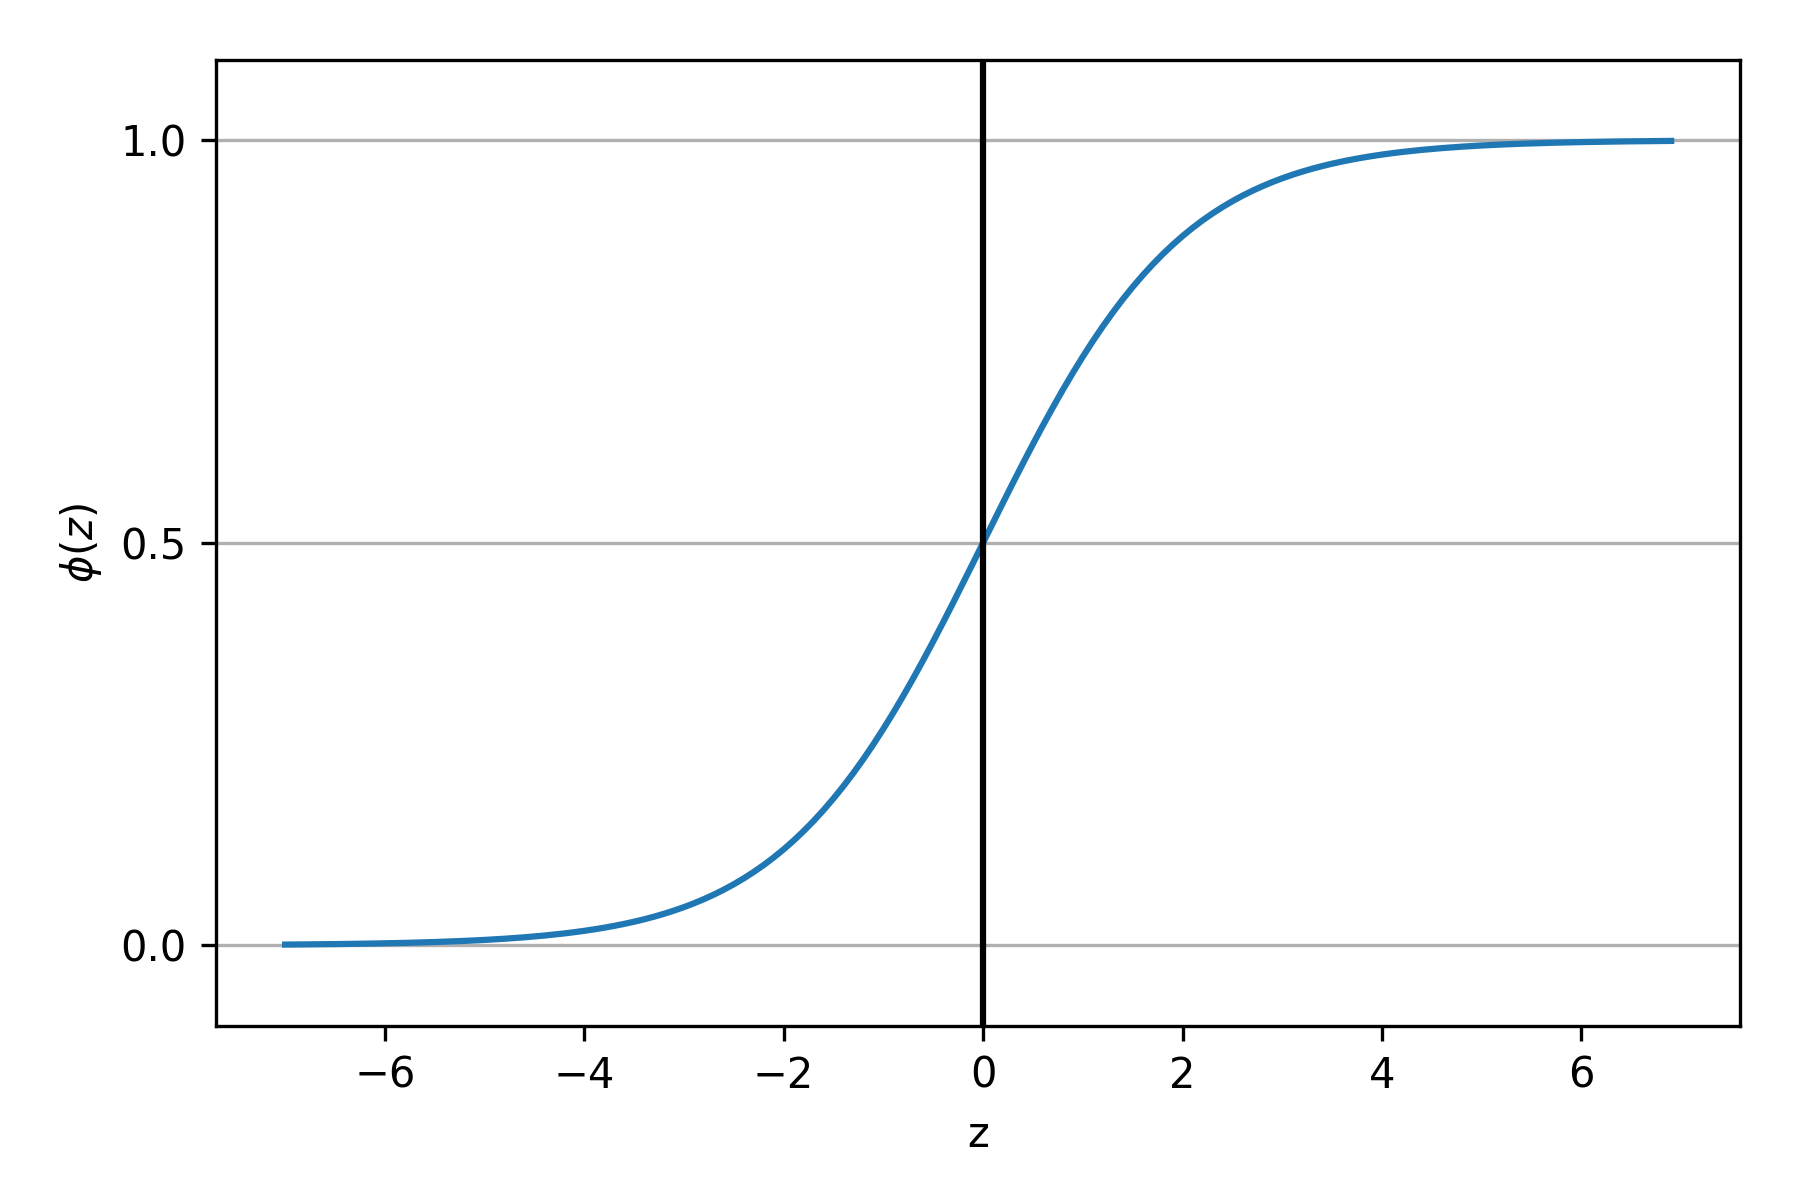

In [14]:
Image(filename='images/03_02.png', width=500) 

Có thể thấy sigmoid nhận giá trị đầu vào $-\infty$ $\rightarrow$ $+\infty$ và cho ra output 0 $\rightarrow$ 1

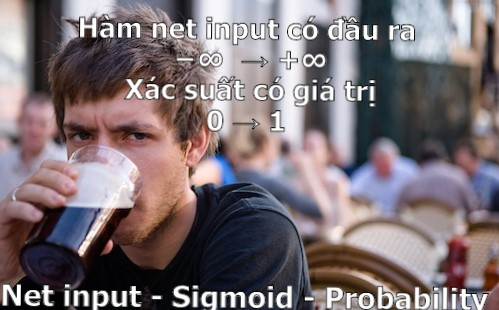

In [3]:
Image(filename='images/net_sig_pro1.png', width=500) 

Như vậy, có thể thấy sigmoid là hàm trung gian biểu thị mối quan hệ tuyến tính giữa các đặc trưng $x$
và giá trị xác suất $p$ cần dự đoán.

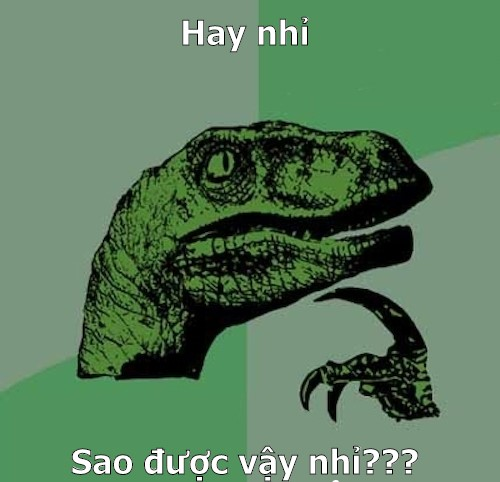

In [4]:
Image(filename='images/question1.png', width=500) 

Hàm Sigmoid là một hàm nghịch đảo của [logit](https://en.wikipedia.org/wiki/Logit). Logit là sự kết hợp giữa  [odd (tỉ lệ cược)](https://www.theanalysisfactor.com/understanding-odds-and-probability/) và logarit cơ số e. Tương tự như xác suất, odd là một khái niệm trong thống kê thể hiện số lần thành công xảy ra so với số lần thất bại xảy ra. Mặc dù xác suất và tỷ lệ cược đều đo lường khả năng xảy ra điều gì đó, nhưng xác suất được dùng nhiều hơn trong thực tế vì nó dễ hiểu hơn đối với hầu hết chúng ta.

$\quad \quad \quad \quad \quad \quad \quad \quad \text{Odds:}$ $$\frac{p}{1-p} = \frac{\frac{C_{positive}}{n}}{\frac{C_{nagative}}{n}} = \frac{C_{positive}}{C_{nagative}}$$

$\quad \quad \quad \quad \quad \quad \quad \quad \text{Logit:}$$$\ln{\frac{p}{1-p}}$$


Hàm logit nhận giá trị đầu vào trong (0, 1) và biến đổi chúng thành các giá trị trên toàn bộ phạm vi số thực $(-\infty, +\infty)$, mà chúng ta có thể sử dụng để biểu thị mối quan hệ giữa sự kết hợp tuyến tính các feature $z = (w^T.x)$ và xác suất xảy ra $(p)$:

$$Logit(p(y = 1 |x)) = w^T.x$$
$$\Leftrightarrow \ln{\frac{p}{1-p}} = z$$
$$\Leftrightarrow \frac{p}{1 - p} = e^{z} $$
$$\Leftrightarrow p = e^z(1 - p) $$
$$\Leftrightarrow p = e^z - e^zp $$
$$\Leftrightarrow e^z = p + e^zp $$
$$\Leftrightarrow e^z = p(1 + e^z) $$
$$\Leftrightarrow p = \frac{e^z}{1 + e^z} = \frac{1}{e^{-z}(1 + e^z)} = \frac{1}{1 + e^{-z}}$$

Như vậy ta đặt $\phi{(z)} = \frac{1}{1 + e^{-z}}$ là activation function của Logistis regression. Có thể nói [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) xuất phát từ một khái niệm trong thống kê, nên việc sử dụng nó để ánh xạ từ $z = (w^T.x)$ đến xác suất là có cơ sở.

<br>
<br>

### 2.2 Lost function

Nếu như MSE là phương pháp được sử dụng để ước tính các tham số trong logistic regression thì Logistic regression sử dụng **maximun likelihood**  để ước tính tham số w.

- Xét N mẫu dữ liệu được gán nhãn 0 hoặc 1:
    - Với mẫu dữ liệu được gán nhãn 1: chúng ta muốn ước tính tham số W sao cho giá trị đầu ra $\phi{(z)}$ gần với xác suất là 1 nhất có thể.
    - Với mẫu dữ liệu được gán nhãn 0: chúng ta muốn ước tính tham số W sao cho giá trị đầu ra $1 - \phi{(z)}$ gần với xác suất là 1 nhất có thể.
- Tóm lại:
    - Với tất cả mẫu có nhãn 1, chúng ta muốn ước tính $\hat{y}$ sao cho tích của tất cả xác suất có điền kiệu của các mẫu này sao cho gần 1 nhất có thể. Nghĩa là cần maximize $\prod_{ i \in \{y = 1\}} \phi{(z^{(i)})}$ (1)
    - Tương tự với tất cả mẫu có nhãn 0, ta cần maximize $\prod_{ i \in \{y = 0\}} 1 - \phi{(z^{(i)})}$ (2)
- Kết hợp (1) và (2) ta muốn ước tính W sao cho maximize hàm $$L(w) = \prod_{ i \in \{y = 1\}} \phi{(z^{(i)})} \times \prod_{ i \in \{y = 0\}} 1 - \phi{(z^{(i)})}$$ cho toàn bộ dataset.

$$L(w) = \prod_{ i \in \{y = 1\}} \phi{(z^{(i)})} \times \prod_{ i \in \{y = 0\}} 1 - \phi{(z^{(i)})} = \prod_i^n {\phi{(z^{(i)})}}^{y^{(i)}} \times (1 - \phi{(z^{(i)})}) ^{1 - y^{(i)}} $$ gọi là **likelihood function**


Trong thực thế, maximize logarit cơ số e của hàm này dễ dàng hơn.

**log-likelihood function**: $$l(w) = \log{L(w)} = \sum_{i = 1}^n [ y^{(i)}\log{({\phi{(z^{(i)})}})} + (1 - y^{(i)})\log{(1 - \phi{(z^{(i)})})}]$$
- Sử dụng log để giảm thiểu khả năng xảy ra lỗi *numberical underflow*, có thể xảy ra khi hàm likelihood quá nhỏ $~ 10^{-123}$.
- Log còn dùng để chuyển đổi dấu $\times$ thành $+$ điều này làm cho việc đạo hàm dễ dàng hơn.

Bây giờ có thể sử dụng Gradient Descent để maximize log-likelihood function hay minimize nó khi viết dưới dạng *cost function*:
$$J(W) = \sum_{i = 1}^n [- y^{(i)}\log{({\phi{(z^{(i)})}})} - (1 - y^{(i)})\log{(1 - \phi{(z^{(i)})})}]$$

*Cost function* một mẫu dữ liệu: 
$$j(w) = - y\log{({\phi{(z)}})} - (1 - y)\log{(1 - \phi{(z)})}$$

Để tính toán Gradient Descent của cost function, chúng ta cần tính đạo hàm riêng của hàm chi phí theo $w$:

$$\frac{\partial j(w)}{\partial w} = - \frac {\partial}{\partial w} [y\log{({\phi{(z)}})} + (1 - y)\log{(1 - \phi{(z)})}] $$

$$=  -( y \frac{1}{\phi{(z)}} - (1 - y)\frac{1}{1 - \phi{(z)}}) \frac {\partial}{\partial w} \phi{(z)}  (1)$$

Ta có: $$\frac {\partial}{\partial w} \phi{(z)}$$ 
$$= \frac {\partial}{\partial w} \frac{1}{1 + e^{-z}}$$

$$= \frac{e^{-z}}{(1 + e^{-z})^2}\frac {\partial}{\partial w}z$$
$$= \frac{1}{1 + e^{-z}}\frac{e^{-z}}{1 + e^{-z}} \frac{\partial}{\partial w}z$$

$$ = \phi(z) (1 - \frac{1}{1 + e^{-z}}) \frac{\partial}{\partial w}z $$
$$= \phi(z) (1 - \phi{(z)})x  (2)$$ 

Thay (2) vào (1) ta được:

$$\frac{\partial j(w)}{\partial w} =  -( y \frac{1}{\phi{(z)}} - (1 - y)\frac{1}{1 - \phi{(z)}}) \phi(z) (1 - \phi{(z)})x$$


$$= - [y(1 - \phi{z}) - (1 - y)\phi{(z)}]x $$
$$= (y - y \phi{(z)} -\phi{(z)} + y \phi{(z)})x $$

$$ = -(y - \phi{(z)})x$$

Từ đó suy ra đạo hàm riêng của toàn data set là:

$$\frac{\partial}{\partial W}J(W) = -\sum_{i = 1}^n (y^{(i)} - \phi{(z^{(i)})})x^{(i)} = \nabla{J(W)}$$

Sử dụng GD, chúng ta có thể update W theo cách đi ngược chiều Gradient,$ \nabla{J(W)}$, của cost function $J(W)$:

$$W = W + \bigtriangleup{W}$$
Với $\bigtriangleup{W} = - \eta \nabla{J(W)}  = - \eta [-\sum_{i = 1}^n (y^{(i)} - \phi{(z^{(i)})})]$

$= \eta \sum_{i = 1}^n (y^{(i)} - \phi{(z^{(i)})})$



<br>
<br>

## 3. Demo đơn giản

Sử dụng logistic regression trong scikit learn để hiện thực hoá một mô hình đơn giản

In [24]:
# Chuẩn bị dữ liệu
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Chuẩn hoá dữ liệu
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [25]:
# Training
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver = 'lbfgs', multi_class = 'ovr')
lr.fit(X_train_std, y_train)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=1, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [1]:
plot_decision_regions(X_test_std, y_test,
                      classifier=lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('images/03_06.png', dpi=300)
plt.show()
print('Accuracy: %.3f' % lr.score(X_test_std, y_test))

NameError: name 'lr' is not defined

In [16]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [70]:
lr.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [71]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [72]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [73]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [83]:
X_test_std[0, :].reshape(1, -1).shape
# lr.predict(X_test_std[0, :].reshape(1, -1))

(1, 2)

<br>
<br>

## 4. Hạn chế

- Giới hạn về kết quả đầu ra: Hồi quy logistic hoạt động tốt để dự đoán kết quả phân lớp như bệnh hay không bệnh . Nó còn có thể dự đoán với dữ liệu có hơn 2 lớp bằng cách sử dụng các kỹ thuật như: OvR (One vs the Rest). Tuy nhiên, hồi quy logistic không hoạt động với dữ liệu có đầu ra liên tục như giá nhà, nhiệt độ,...
- Yêu cầu các điểm dữ liệu là độc lập, nhưng trên thực tế thì các điểm dữ liệu có thể bị ảnh hưởng bởi nhau. Do đó, người ta thưởng giả định về sự độc lập giữa các điểm dữ liệu khi mô hình hoá hồi quy logistic.

In [ ]:
https://en.wikipedia.org/wiki/Logistic_regression
https://www.theanalysisfactor.com/why-use-odds-ratios/
https://www.theanalysisfactor.com/understanding-odds-and-probability/
https://www.theclassroom.com/disadvantages-logistic-regression-8574447.html